In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [3]:
%%time
flights_df = pd.read_csv('2008.csv.tar', usecols=dtype.keys(), dtype=dtype)

Wall time: 34.4 s


In [4]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


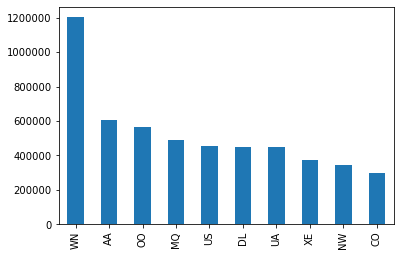

In [5]:
flights_df['UniqueCarrier'].value_counts()[0:10].plot(kind = 'bar', label='UniqueCarrier') #EV нет в этом списке

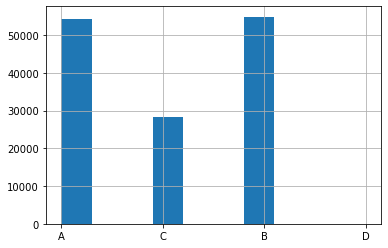

In [6]:
flights_df['CancellationCode'].hist() #погодные условия - самая частая причина отмена полетов

In [8]:
flights_df['Route'] = flights_df['Origin'] + '-' + flights_df['Dest']
flights_df.groupby('Route').size().idxmax() #San-Francisco – Los-Angeles 

'SFO-LAX'

In [10]:
top_delayed = flights_df[flights_df['DepDelay'] > 0].groupby('Route').size().sort_values(ascending=False).iloc[:5].index
flights_df[(flights_df['Route'].isin(top_delayed)) & (flights_df['WeatherDelay'] > 0)]['FlightNum'].count() #668

668

In [11]:
top_delayed

Index(['LAX-SFO', 'DAL-HOU', 'SFO-LAX', 'ORD-LGA', 'HOU-DAL'], dtype='object', name='Route')

In [15]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

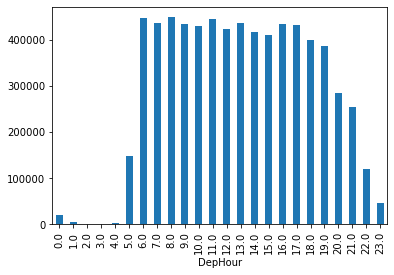

In [17]:
flights_df.groupby('DepHour').size().plot(kind='bar') #In the period from 0 am to 4 am 
#there are considerably less flights than from 7 pm to 8 pm.

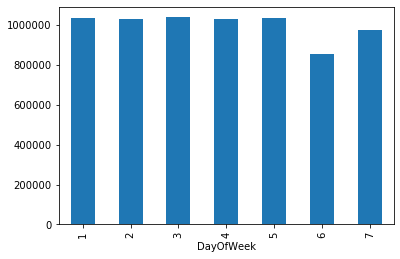

In [20]:
flights_df.groupby('DayOfWeek').size().plot(kind='bar')
#The number of flights during weekends is less than during weekdays (working days).

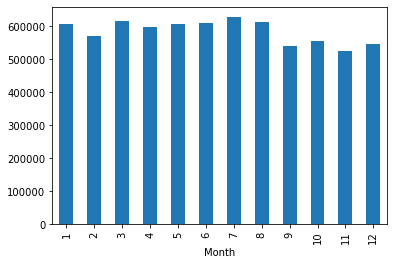

In [21]:
flights_df.groupby('Month').size().plot(kind='bar')
#There are less flights during winter than during summer.

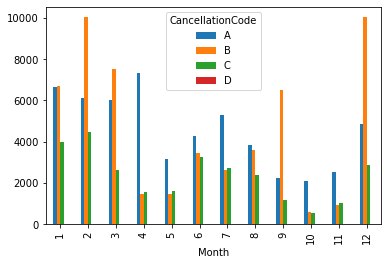

In [29]:
weather = pd.crosstab(flights_df['Month'], flights_df['CancellationCode'])
weather.plot(kind='bar')
#December has the highest rate of cancellations due to weather.
#April's top cancellation reason is carriers.

In [30]:
weather['A'].sum()

54330

In [31]:
weather['C'].sum()

28188

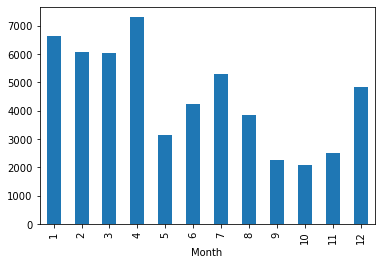

In [33]:
flights_df[flights_df['CancellationCode'] == 'A'].groupby('Month').size().plot(kind='bar') #April

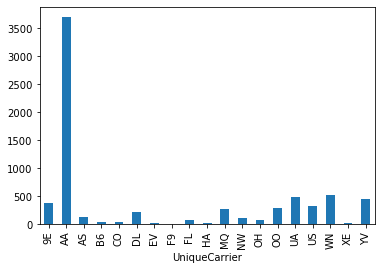

In [35]:
flights_df[(flights_df['Month'] == 4) & (flights_df['CancellationCode'] == 'A')].groupby('UniqueCarrier').size().plot(kind='bar')
#AA

In [36]:
data = flights_df[(flights_df['DepDelay'] >= 0) & (flights_df['ArrDelay'] >= 0)].\
                    groupby('UniqueCarrier')[['DepDelay', 'ArrDelay']].median()

In [37]:
data

,DepDelay,ArrDelay
UniqueCarrier,,
9E,21.0,23.0
AA,22.0,25.0
AQ,5.0,6.0
AS,16.0,18.0
B6,28.0,31.0
CO,17.0,19.0
DL,15.0,19.0
EV,21.0,23.0
F9,12.0,14.0


In [38]:
data['DepDelay'].idxmin() #AQ

'AQ'

In [39]:
data['ArrDelay'].idxmin()  #AQ

'AQ'